In [ ]:
# loading required library
import pandas as pd

In [ ]:
df = pd.read_csv("BrainTumor.csv")
df.columns

Index(['Image', 'Class', 'Mean', 'Variance', 'Standard Deviation', 'Entropy',
       'Skewness', 'Kurtosis', 'Contrast', 'Energy', 'ASM', 'Homogeneity',
       'Dissimilarity', 'Correlation', 'Coarseness'],
      dtype='object')

In [ ]:
# droping some column from data set 
dfMod=df.drop(['Image','Mean','Variance','Standard Deviation'],axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3762 entries, 0 to 3761
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Image               3762 non-null   object 
 1   Class               3762 non-null   int64  
 2   Mean                3762 non-null   float64
 3   Variance            3762 non-null   float64
 4   Standard Deviation  3762 non-null   float64
 5   Entropy             3762 non-null   float64
 6   Skewness            3762 non-null   float64
 7   Kurtosis            3762 non-null   float64
 8   Contrast            3762 non-null   float64
 9   Energy              3762 non-null   float64
 10  ASM                 3762 non-null   float64
 11  Homogeneity         3762 non-null   float64
 12  Dissimilarity       3762 non-null   float64
 13  Correlation         3762 non-null   float64
 14  Coarseness          3762 non-null   float64
dtypes: float64(13), int64(1), object(1)
memory usage: 441.0

In [ ]:
target=['Non-Tumor','Tumor']
print("Tagret to classify after training: ",target)

Tagret to classify after training:  ['Non-Tumor', 'Tumor']


In [ ]:
dfMod['ClassName'] =dfMod.Class.apply(lambda x: target[x])

In [ ]:
print("\n printing first five data from dataframe with taget equal to 0:\n")
dfMod[dfMod.Class==0].head()



 printing first five data from dataframe with taget equal to 0:



,Class,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness,ClassName
0,0,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155,Non-Tumor
1,0,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155,Non-Tumor
4,0,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155,Non-Tumor
5,0,0.214086,3.729886,14.471736,105.077882,0.421587,0.177736,0.598169,4.193146,0.976485,7.458341e-155,Non-Tumor
6,0,0.128833,2.930095,8.969348,115.203118,0.320675,0.102832,0.532292,4.880320,0.974745,7.458341e-155,Non-Tumor


In [ ]:
print("\n printing first five data from dataframe with taget equal to 1:\n")
dfMod[dfMod.Class==1].head()


 printing first five data from dataframe with taget equal to 1:



,Class,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness,ClassName
2,1,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155,Tumor
3,1,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155,Tumor
9,1,0.003002,4.365000,19.682514,72.588783,0.045685,0.002087,0.361432,4.590795,0.967830,7.458341e-155,Tumor
10,1,0.002436,3.872728,15.552862,66.285462,0.041140,0.001692,0.375618,4.626763,0.968750,7.458341e-155,Tumor
11,1,0.003769,3.623978,14.762270,165.484791,0.051321,0.002634,0.385292,5.215436,0.958601,7.458341e-155,Tumor


In [ ]:
from sklearn.model_selection import train_test_split
# Droping un-nessasery data and considering important data for training in x
X_train, X_test, y_train, y_test = train_test_split(dfMod.drop(['Class','ClassName'],axis=1), 
                                                    dfMod.Class, test_size=0.2)

In [ ]:
# Creating training dataframe from splited data
df_train=pd.concat([X_train,y_train],axis=1)
df_train.head()

,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness,Class
970,0.001476,3.302441,11.706961,174.416118,0.032084,0.001029,0.279393,7.593601,0.965906,7.458341e-155,1
2433,0.056104,2.093292,4.767498,82.100077,0.205894,0.042392,0.559670,3.582996,0.945197,7.458341e-155,0
1537,0.258915,3.443764,13.180046,124.100808,0.467335,0.218402,0.674346,3.054163,0.961567,7.458341e-155,0
673,0.110440,2.965006,9.087113,77.699897,0.294844,0.086933,0.570710,3.334763,0.959394,7.458341e-155,0
27,0.068330,4.231537,18.775104,109.319492,0.228934,0.052411,0.503782,4.400896,0.966815,7.458341e-155,0


In [ ]:
df_test=pd.concat([X_test,y_test],axis=1)
df_test.head()

,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness,Class
3699,0.109351,2.398633,6.275350,117.309516,0.293772,0.086302,0.522898,4.555838,0.968757,7.458341e-155,0
2643,0.167707,3.220618,10.832983,64.223560,0.369228,0.136329,0.607826,3.122785,0.980811,7.458341e-155,0
854,0.089985,2.331024,5.704141,49.729749,0.264303,0.069856,0.570825,2.696535,0.969254,7.458341e-155,0
357,0.006911,6.592357,45.780610,264.976051,0.069897,0.004886,0.368187,7.428641,0.966718,7.458341e-155,1
1599,0.034590,4.748269,23.239375,194.868205,0.160403,0.025729,0.431861,5.176923,0.976945,7.458341e-155,1


In [ ]:
import math
from sklearn.neighbors import KNeighborsClassifier
k=int(math.sqrt(len(X_train)))
if k%2==0:
  k+=-1
model = KNeighborsClassifier(n_neighbors=k)

In [ ]:
model.fit(X_train,y_train)
# Predicting test data and comparing with actual data 
df_test['Predicted_Class'] = model.predict(X_test)
df_test[['Class','Predicted_Class']]

,Class,Predicted_Class
3699,0,0
2643,0,0
854,0,0
357,1,1
1599,1,1
...,...,...
497,0,0
2372,1,1
2400,0,0
3098,1,0


In [ ]:
# finding accuracy of trained model with splitted test data set using score method
print("Accuracy of Trained model is: ",model.score(X_test,y_test))

Accuracy of Trained model is:  0.7715803452855245


In [ ]:
print("Predicting value for [[0.3,3.5,15,150,0.5,0.06,0.6,5,0.99,8]] using trained model:" , target[model.predict([[0.3,3.5,15,150,0.5,0.06,0.6,5,0.99,8]])[0]])

Predicting value for [[0.3,3.5,15,150,0.5,0.06,0.6,5,0.99,8]] using trained model: Tumor


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
# Creating confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[348,  66],
       [106, 233]])

Text(33.0, 0.5, 'Truth')

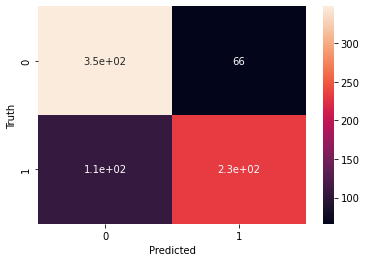

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.84      0.80       414
           1       0.78      0.69      0.73       339

    accuracy                           0.77       753
   macro avg       0.77      0.76      0.77       753
weighted avg       0.77      0.77      0.77       753



In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80      1665
           1       0.77      0.69      0.73      1344

    accuracy                           0.77      3009
   macro avg       0.77      0.76      0.76      3009
weighted avg       0.77      0.77      0.77      3009

